In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

870


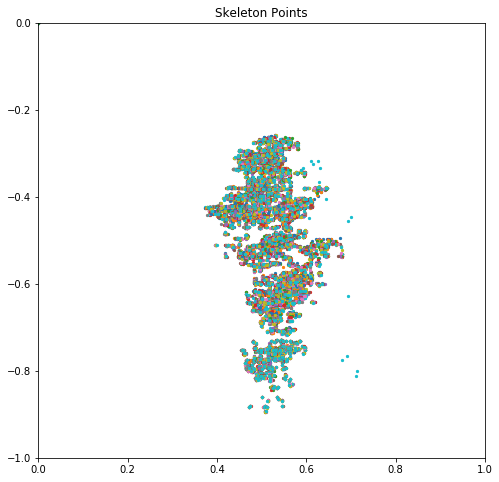

In [2]:
BASE_DIR = "D:\openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\DatasetPosePerDancer\Retire"

#run through each dancer folder and plot the coordinates
count = 0
def plotCoordinates():
    fig, ax = plt.subplots(1, figsize=(8,8))
    plt.title('Skeleton Points')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global count
    for subdir, dirs, files in os.walk(BASE_DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(BASE_DIR,subdir,file)
                #print(file_path)
                raw_img_json = pd.read_json(file_path)
                img_keypoints_list = raw_img_json.people[0]['pose_keypoints_2d']
                x = img_keypoints_list[0::3]
                posY = img_keypoints_list[1::3]
                y = [-y for y in posY]
                sc = ax.scatter(x,y, s=5)
                count+=1
plotCoordinates()
print(count)

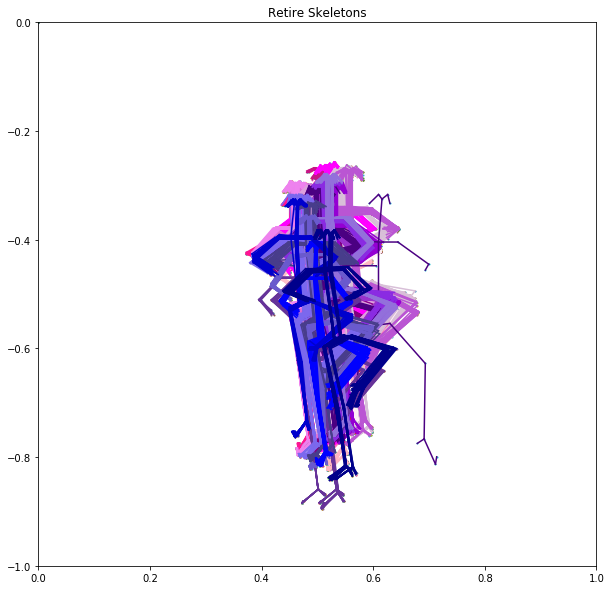

In [3]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']
allXList =[]
allYList = []
dancerNum = 0
def plotSkeletons():
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.title('Retire Skeletons')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global dancerNum
    for subdir, dirs, files in os.walk(BASE_DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(BASE_DIR,subdir,file)
                raw_img_json = pd.read_json(file_path)
                img_keypoints_list = raw_img_json.people[0]['pose_keypoints_2d']
                x = img_keypoints_list[0::3]
                allXList.append(x)
                posY = img_keypoints_list[1::3]
                y = [-y for y in posY]
                allYList.append(y)
                sc = ax.scatter(x,y, s=1)
                for bone in bones:
                    #Remove the 0,0 xy coordinates plotting
                    if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                        #print("zero values for joint: ",x.index(x[bone[0]]))
                        #print("zero values for joint: ",x.index(x[bone[1]]))
                        continue
                    #ax.plot([x_values],[y_values])
                    ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]],penColor[dancerNum-1])
        dancerNum+=1
plotSkeletons()

In [4]:
np.save('allRetireXList.npy', allXList)
np.save('allRetireYList.npy', allYList)

In [5]:
xloaded = np.load('allRetireXList.npy')
print(xloaded)
print(len(xloaded))
yloaded = np.load('allRetireYList.npy')
print(yloaded)
print(len(yloaded))

[[0.51959  0.515579 0.48483  ... 0.523693 0.521593 0.550209]
 [0.523637 0.517518 0.484847 ... 0.523634 0.519604 0.55022 ]
 [0.519619 0.515609 0.484834 ... 0.523643 0.519596 0.550209]
 ...
 [0.513442 0.51344  0.480799 ... 0.523685 0.52769  0.562378]
 [0.513439 0.513455 0.480761 ... 0.525716 0.527744 0.562451]
 [0.513448 0.513454 0.480817 ... 0.525708 0.527713 0.562372]]
870
[[-0.338809 -0.404416 -0.404394 ... -0.812963 -0.799507 -0.793957]
 [-0.3363   -0.404434 -0.404425 ... -0.812947 -0.799489 -0.794041]
 [-0.336225 -0.404451 -0.40444  ... -0.812964 -0.799513 -0.794076]
 ...
 [-0.393374 -0.453429 -0.458751 ... -0.840363 -0.837546 -0.832049]
 [-0.39072  -0.456095 -0.458787 ... -0.840376 -0.837566 -0.834755]
 [-0.393374 -0.453429 -0.456138 ... -0.840379 -0.837559 -0.832115]]
870


In [6]:
# Now calculate mean skeleton:
sumXList = [sum(i) for i in zip(*allXList)]# the * indicates the use of iterables
sumYList = [sum(j) for j in zip(*allYList)]
print(sumXList)
print(sumYList)

#Get the average: sum/count
avgXList = [sx / count for sx in sumXList]
avgYList = [sy / count for sy in sumYList]
print(avgXList)
print(avgYList)

[437.1756460000003, 437.1682840000004, 408.73186199999975, 372.696976, 399.84859100000006, 465.2481980000002, 501.62996400000065, 475.15872299999995, 451.0793939999998, 433.2570639999992, 451.43231999999983, 464.50420400000024, 468.6215879999997, 534.2841809999994, 480.2892290000003, 430.9158290000002, 443.40582299999977, 422.5820250000005, 452.2042830000001, 471.1986440000002, 466.5999570000006, 470.6850779999994, 442.6708310000002, 441.50143300000013, 470.2896469999993]
[-282.83071100000024, -340.5008470000003, -341.2096939999999, -375.7069879999997, -392.1941439999998, -339.3298829999996, -373.50603199999944, -389.3284899999999, -456.2368179999999, -464.0740399999999, -561.7780070000001, -660.9049489999995, -448.9504369999993, -473.5072460000002, -535.4568820000002, -275.9266199999997, -275.7934709999999, -287.45157299999994, -286.767646, -560.342117, -554.1552219999998, -535.5730129999998, -682.4254370000009, -676.722198, -670.585302]
[0.502500742528736, 0.5024922804597706, 0.46980

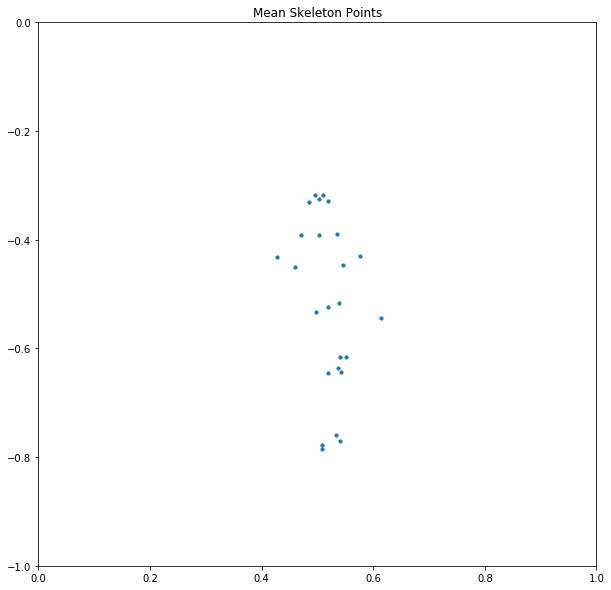

In [7]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
#Plot mean skeleton:
def plotMeanCoordinates():
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Mean Skeleton Points')
    plt.xlim(0, 1)
    plt.ylim(-1, 0)
    sc = ax.scatter(avgXList,avgYList, s=10)
    #for bone in bones:
        #if avgXList[bone[0]]== 0.0 or avgYList[bone[0]] == 0.0  or avgXList[bone[1]] == 0.0 or avgYList[bone[1]] == 0.0:
            #print("zero values for joint: ",avgXList.index(avgXList[bone[0]]))
            #print("zero values for joint: ",avgXList.index(avgXList[bone[1]]))
            
        #ax.plot([avgXList[bone[0]],avgXList[bone[1]]],[avgYList[bone[0]],avgYList[bone[1]]])
plotMeanCoordinates()

In [8]:
#calculation of standard deviation values:
import statistics

In [9]:
standardDeviationX = [statistics.stdev(i) for i in zip(*allXList)]
standardDeviationY = [statistics.stdev(i) for i in zip(*allYList)]

print("Standard Deviations of X values:",standardDeviationX)
print("Standard Deviations of Y values:",standardDeviationY) 

Standard Deviations of X values: [0.025000544603005468, 0.02525182253905263, 0.024777163850961813, 0.025597608963424643, 0.024970780817289092, 0.02622279441822527, 0.027856071800950455, 0.02892842969670942, 0.02619849096306556, 0.025729236021288612, 0.025865361820860782, 0.026484595781664566, 0.026302881615588195, 0.028265344958815202, 0.0391288044454971, 0.024905487610056492, 0.025189374567951985, 0.02463907403315154, 0.025283213082936642, 0.03778536757069462, 0.07174297218981725, 0.038190423153433066, 0.030039983833117803, 0.030858664432641618, 0.027275713567392272]
Standard Deviations of Y values: [0.03643207706256416, 0.03275387137516488, 0.03267437301137908, 0.03308504716494665, 0.0347512506626368, 0.03308878997508829, 0.03370555211657201, 0.03475148193808213, 0.03189127302619472, 0.031326149814349204, 0.029510660250642425, 0.02889961035721444, 0.031176074263257247, 0.033480513383896106, 0.0444252286902224, 0.03611730025868205, 0.03639256271092319, 0.0358562646980354, 0.0363261032

In [10]:
print(len(standardDeviationX))
print(len(avgXList))

25
25


In [11]:
np.save('RetireStdDevX.npy', standardDeviationX)
np.save('RetireStdDevY.npy', standardDeviationY)
np.save('RetireMeanX.npy', avgXList)
np.save('RetireMeanY.npy', avgYList)